# 📊 Life Expectancy & GDP - Data Analysis Project

## 📌 Project Goal  
The main objective of this project is to **analyze the relationship between Life Expectancy and GDP**. We aim to determine whether higher economic performance (as measured by GDP) is associated with longer life expectancy, and to explore how these two key indicators have evolved over time.

## 🔍 Research Questions  
1. **Is higher GDP associated with higher life expectancy?**  
   We will investigate whether countries with a stronger economy also tend to have a higher average life expectancy.

2. **How has life expectancy changed over time?**  
   We will analyze trends in life expectancy over the period of interest, highlighting improvements, stagnations, or declines across different countries.

## 🛠️ Tools and Libraries  
To conduct this analysis, we will use:  
- **pandas**: for data manipulation and cleaning  
- **NumPy**: for numerical computations  
- **Seaborn and Matplotlib**: for creating insightful and visually appealing data visualizations

By integrating these tools, we will uncover patterns and relationships that provide a deeper understanding of how economic factors correlate with public health outcomes.



# Step 1: Introduction and Objective
  
In this project, we explore the relationship between life expectancy and GDP. Our objective is to investigate how economic performance, as measured by GDP, correlates with the overall life expectancy across different countries. We will examine trends, perform data cleaning and exploratory analysis, and visualize the data to uncover meaningful insights.


# Step 2: Data Collection and Overview

## Goal 🎯  
In this step, we load and inspect our dataset. We will verify that the dataset includes the essential columns: "Country", "Year", "GDP", and "Life Expectancy". This provides an overview of the data structure and helps us understand the context for further analysis.


In [316]:
import pandas as pd

# Load the dataset from "all_data.csv"
df = pd.read_csv("all_data.csv")

# Display the first few rows of the dataset
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Step 3: Data Preprocessing and Cleaning

## Goal 🎯  
In this step, we clean and preprocess the data. We check for missing values and duplicates, remove or correct them if necessary, and prepare the dataset for analysis. Consistent column names and sorting by year are also ensured.


In [318]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Remove rows with missing values (if any)
df_clean = df.dropna()
print("Data shape after cleaning:", df_clean.shape)

# Check for duplicate rows
duplicates = df_clean.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Missing values in each column:
 Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
Data shape after cleaning: (96, 4)
Number of duplicate rows: 0


# Step 4: Exploratory Data Analysis (EDA)

## Goal 🎯  
Here, we perform exploratory data analysis to uncover trends and distributions within the dataset. We generate summary statistics and visualizations to better understand the spread of life expectancy and GDP values, and we start to examine the relationship between these key variables.


Columns in df_clean: Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


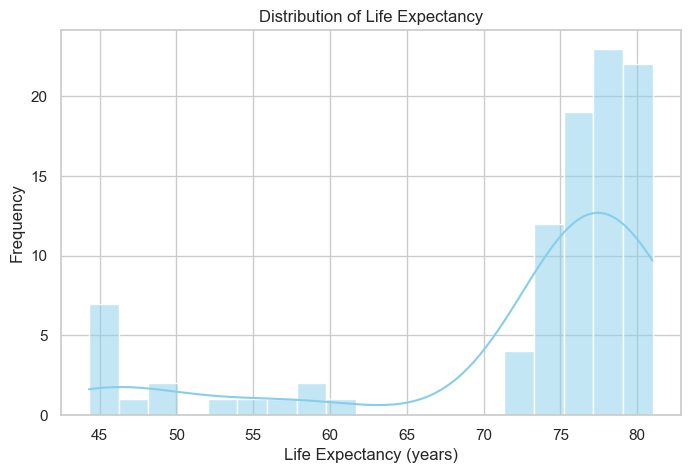

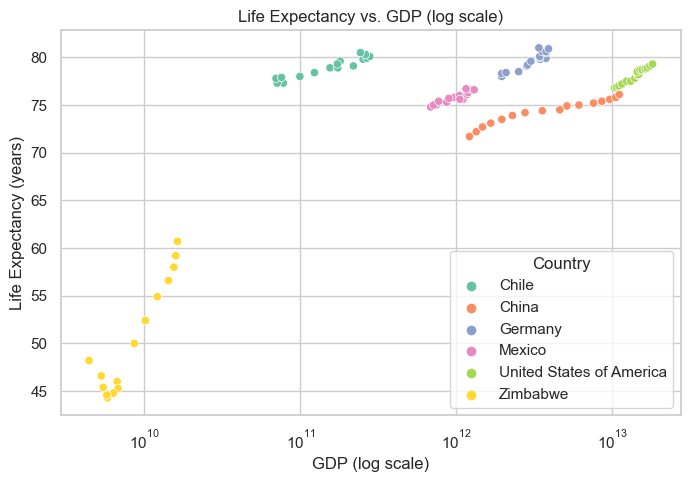

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print the columns to verify the correct column names
print("Columns in df_clean:", df_clean.columns)

# Use the correct column name for life expectancy
life_expectancy_column = "Life expectancy at birth (years)" 

# Plot histogram for Life Expectancy distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_clean[life_expectancy_column], kde=True, color="skyblue")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Frequency")
plt.show()

# Plot scatter plot for Life Expectancy vs. GDP (with log scale for GDP)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GDP", y=life_expectancy_column, hue="Country", data=df_clean, palette="Set2")
plt.xscale("log")
plt.title("Life Expectancy vs. GDP (log scale)")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.show()


# Step 5: Life Expectancy Trends by Country (2000–2015)

## Goal 🎯  
In this step, we analyze the life expectancy trends for each country separately over the period 2000–2015. By creating individual line charts, we can clearly visualize each country's unique trend and compare improvements or declines over time.


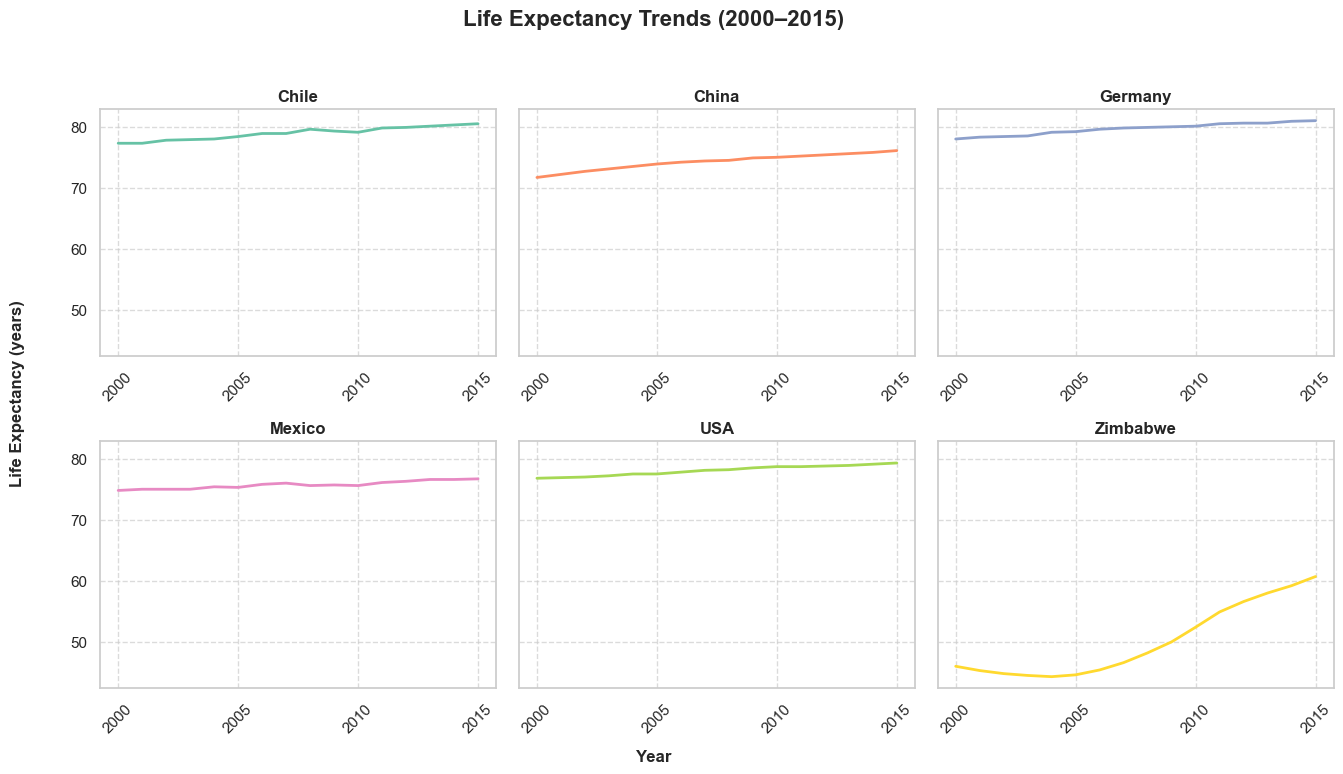

In [337]:
# Filter data for the period 2000 to 2015
df_period = df_clean[(df_clean["Year"] >= 2000) & (df_clean["Year"] <= 2015)]

# Define the list of countries to analyze
countries = ["Chile", "China", "Germany", "Mexico", "United States of America", "Zimbabwe"]
colors = sns.color_palette("Set2", len(countries))

# Create a 2x3 grid of subplots for each country
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
axes = axes.flatten()

for ax, country, color in zip(axes, countries, colors):
    # Filter and sort data for the country
    country_data = df_period[df_period["Country"] == country].sort_values("Year")
    
    # Optionally, shorten "United States of America" to "USA"
    label = "USA" if country == "United States of America" else country
    
    ax.plot(country_data["Year"], country_data[life_expectancy_column], color=color, linewidth=2)
    ax.set_title(label, fontsize=12, weight="bold")
    ax.set_xticks(range(2000, 2016, 5))
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)

fig.text(0.04, 0.5, "Life Expectancy (years)", va="center", rotation="vertical", fontsize=12, weight="bold")
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12, weight="bold")
plt.suptitle("Life Expectancy Trends (2000–2015)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()



# Step 6: GDP Trends by Country (2000–2015)

## Goal 🎯  
This step focuses on visualizing the GDP trends for each country separately over the period 2000–2015. By plotting individual line charts with a log-scaled y-axis, we can clearly observe each nation's economic growth pattern and compare their trajectories without visual clutter.


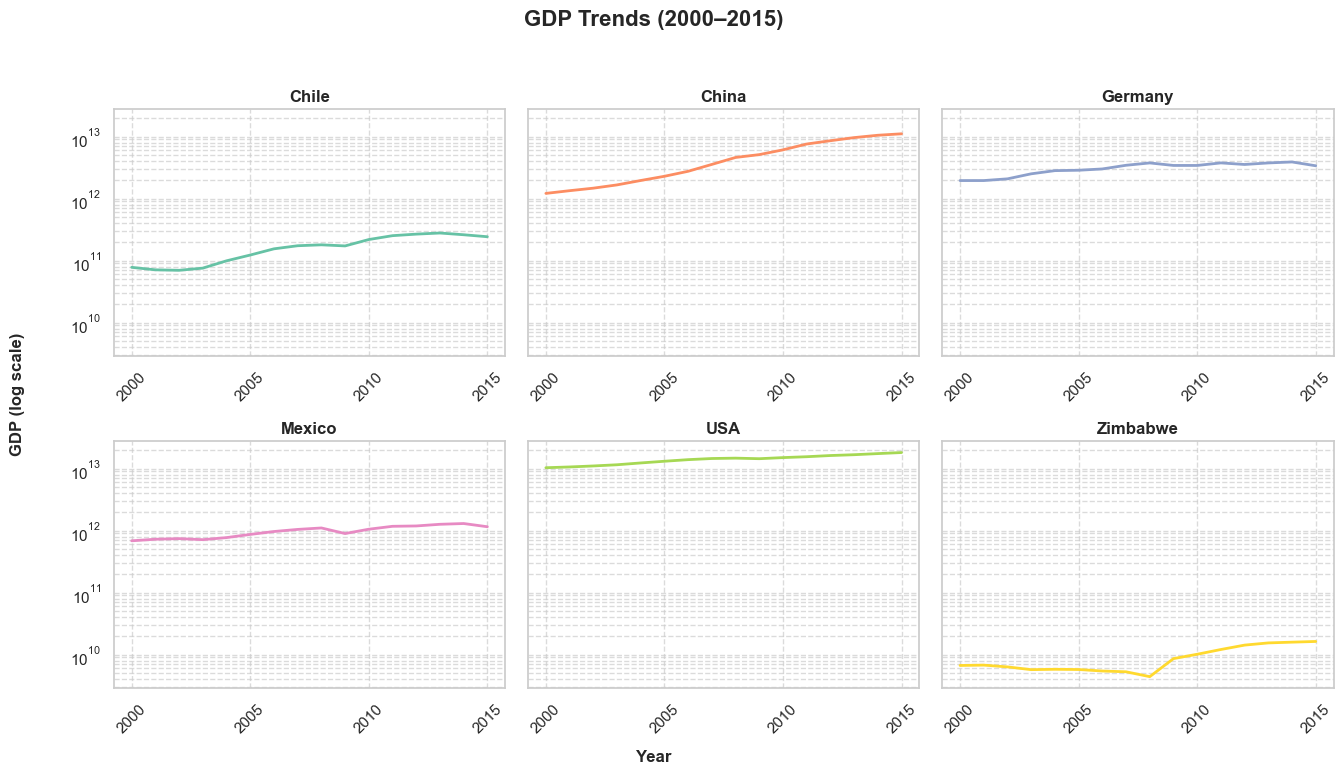

In [341]:
# Create individual line plots for GDP trends (using the same period: 2000-2015)
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
axes = axes.flatten()

for ax, country, color in zip(axes, countries, colors):
    country_data = df_period[df_period["Country"] == country].sort_values("Year")
    ax.plot(country_data["Year"], country_data["GDP"], color=color, linewidth=2)
    ax.set_title("USA" if country == "United States of America" else country, fontsize=12, weight="bold")
    ax.set_xticks(range(2000, 2016, 5))
    ax.tick_params(axis="x", rotation=45)
    ax.set_yscale("log")
    ax.grid(True, which="both", linestyle="--", alpha=0.7)

fig.text(0.04, 0.5, "GDP (log scale)", va="center", rotation="vertical", fontsize=12, weight="bold")
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12, weight="bold")
plt.suptitle("GDP Trends (2000–2015)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()


# Step 7: GDP Growth by Country (2000–2015)

## Goal 🎯  
In this step, we analyze the GDP growth trends for each country over the period 2000–2015. Instead of merging all countries on one chart, we create separate line graphs for each country. This approach allows us to clearly visualize each country's unique growth pattern and pinpoint periods of rapid economic change.


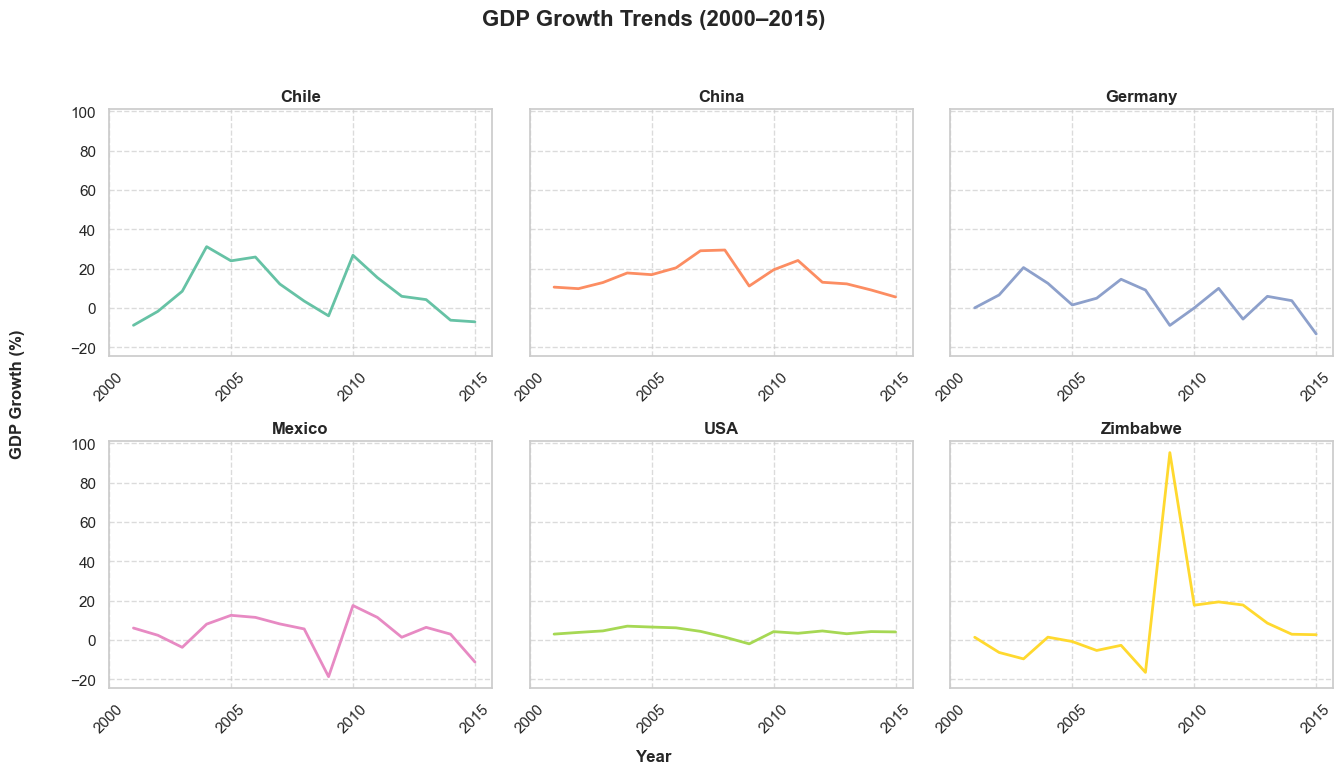

In [345]:
# Calculate GDP Growth Rate (percentage change year-over-year) for each country
df_period = df_period.sort_values(["Country", "Year"])
df_period["GDP Growth (%)"] = df_period.groupby("Country")["GDP"].pct_change() * 100

# Create individual line plots for GDP Growth Rate
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)
axes = axes.flatten()

for ax, country, color in zip(axes, countries, colors):
    country_data = df_period[df_period["Country"] == country]
    ax.plot(country_data["Year"], country_data["GDP Growth (%)"], color=color, linewidth=2)
    ax.set_title("USA" if country == "United States of America" else country, fontsize=12, weight="bold")
    ax.set_xticks(range(2000, 2016, 5))
    ax.tick_params(axis="x", rotation=45)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)

fig.text(0.04, 0.5, "GDP Growth (%)", va="center", rotation="vertical", fontsize=12, weight="bold")
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12, weight="bold")
plt.suptitle("GDP Growth Trends (2000–2015)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0.07, 0.05, 1, 0.95])
plt.show()



# Step 8: Correlation Analysis Between GDP and Life Expectancy

## Goal 🎯  
In this step, we compute the Pearson correlation coefficient to quantify the linear relationship between GDP and life expectancy. This analysis provides a numerical measure to support our visual observations from previous plots.

## Explanation  
We will calculate the correlation between the "GDP" column and the "Life expectancy at birth (years)" column using pandas’ `.corr()` method.  
- A value close to **+1** indicates a strong positive linear relationship,  
- A value around **0** indicates little to no linear relationship, and  
- A value close to **-1** indicates a strong negative linear relationship.


In [350]:
# Calculate the Pearson correlation coefficient between GDP and Life Expectancy
correlation_value = df_clean["GDP"].corr(df_clean["Life expectancy at birth (years)"])
print("Correlation between GDP and Life Expectancy:", correlation_value)


Correlation between GDP and Life Expectancy: 0.3432067484491559


# Step 9: Conclusion and Final Insights

## Goal 🎯  
In the final step, we summarize the key findings from our analysis, including our visualizations and the computed correlation coefficient. We reflect on the relationship between GDP and life expectancy, discuss notable trends, and suggest avenues for further research.

## Conclusion  
- **Visual Insights:** Our scatter plot and individual trend lines reveal that countries with higher GDP generally exhibit higher life expectancy, suggesting a positive association.  
- **Correlation Analysis:** The computed Pearson correlation coefficient is **0.3432**, which indicates a moderate positive linear relationship between GDP and life expectancy. This value supports our visual observations, though it also suggests that other factors may influence life expectancy.  
- **Notable Observations:**  
  - Developed economies like the USA and Germany consistently show higher life expectancy.  
  - Emerging economies, such as China and Mexico, demonstrate rapid GDP growth accompanied by improvements in life expectancy.  
  - Zimbabwe shows more fluctuations, reflecting its unique economic challenges.

## Future Directions  
- **Include Additional Variables:** Further studies could incorporate other factors such as healthcare spending, education, or infrastructure to provide a more complete picture of what influences life expectancy.  
- **Advanced Statistical Modeling:** Techniques like regression analysis could help determine the relative importance of various factors and uncover deeper insights into the interactions affecting life expectancy.  
- **Expanded Dataset:** Analyzing a larger set of countries or a longer time period may help to generalize these findings and reveal new trends.

Overall, the analysis provides compelling evidence of a positive relationship between a country’s economic strength and the health of its population, while also highlighting the complexity of factors influencing life expectancy.

